In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\New folder\\all_stocks_5yr.csv")

In [7]:
#Load and Explore the data

In [8]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [10]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [11]:
#Data Preprocessing

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [14]:
print(df.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [15]:
df.fillna(method='ffill', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10308\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [16]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [17]:
print(df.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [18]:
# Calculates daily percentage change in stock price for each company
df['Daily_Return'] = df.groupby('Name')['close'].pct_change()

In [19]:
df

,date,open,high,low,close,volume,Name,Daily_Return
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.019661
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.013140
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.027330
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.045703
...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,0.014206
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,-0.013364
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,-0.038421
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,-0.007585


In [20]:
#Adds a 7-day moving average to smooth out price fluctuations and identify trends.
df['7Day_MA'] = df.groupby('Name')['close'].transform(lambda x: x.rolling(7).mean())

In [21]:
df

,date,open,high,low,close,volume,Name,Daily_Return,7Day_MA
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.019661,NaN
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.013140,NaN
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.027330,NaN
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.045703,NaN
...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,0.014206,78.535714
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,-0.013364,78.314286
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,-0.038421,77.540000
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,-0.007585,76.565714


In [22]:
# Preview key columns
print(df[['date', 'Name', 'close', 'Daily_Return', '7Day_MA']].tail())

             date Name  close  Daily_Return    7Day_MA
619035 2018-02-01  ZTS  77.82      0.014206  78.535714
619036 2018-02-02  ZTS  76.78     -0.013364  78.314286
619037 2018-02-05  ZTS  73.83     -0.038421  77.540000
619038 2018-02-06  ZTS  73.27     -0.007585  76.565714
619039 2018-02-07  ZTS  73.86      0.008052  75.805714


In [23]:
#Exploratory Data Analysis (EDA)

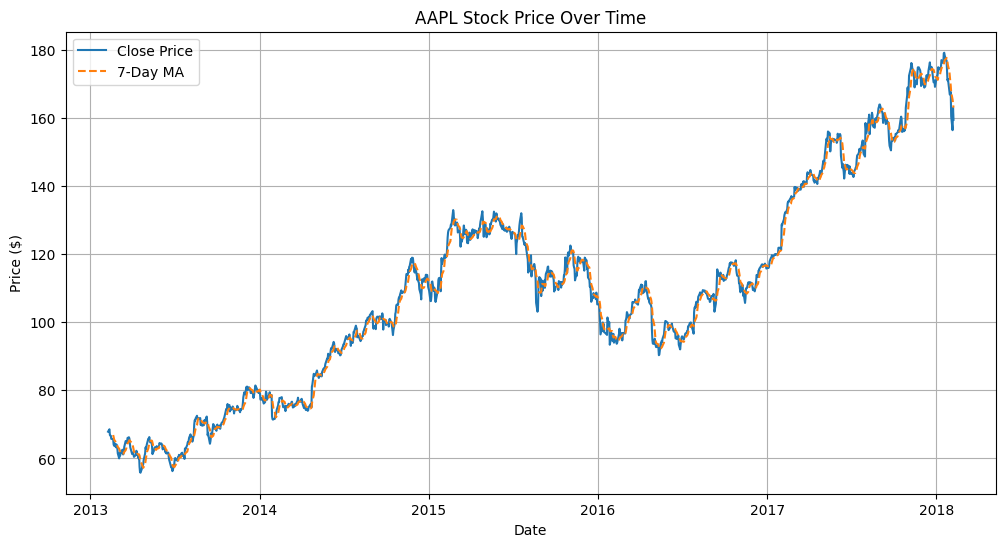

In [24]:
company = 'AAPL'
company_data = df[df['Name'] == company]

plt.figure(figsize=(12,6))
plt.plot(company_data['date'], company_data['close'], label='Close Price')
plt.plot(company_data['date'], company_data['7Day_MA'], label='7-Day MA', linestyle='--')
plt.title(f'{company} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
#Histogram of Daily Returns

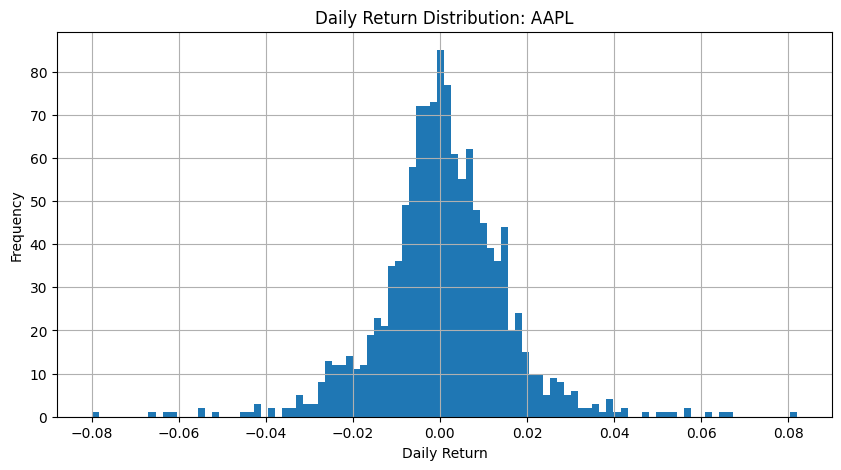

In [26]:
company_data['Daily_Return'].hist(bins=100, figsize=(10,5))
plt.title(f'Daily Return Distribution: {company}')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# it shows the spread and skewness of daily returns, helpful to understand volatility

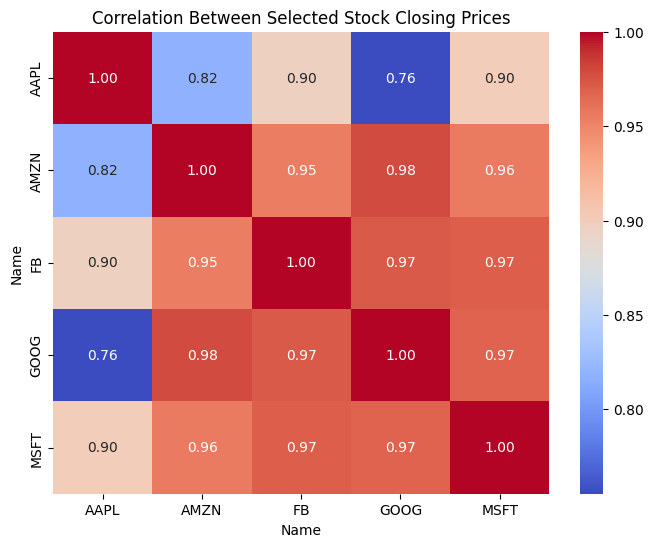

In [27]:
selected_companies = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB']  # You can customize this list

# Create pivot table for only selected companies
filtered_data = df[df['Name'].isin(selected_companies)]
pivot_close_filtered = filtered_data.pivot_table(index='date', columns='Name', values='close')
# Compute correlation
correlation_matrix_filtered = pivot_close_filtered.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_filtered, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Between Selected Stock Closing Prices')
plt.show()

In [28]:
#Feature Engineering

In [29]:
df['Volatility_7Day'] = df.groupby('Name')['Daily_Return'].transform(lambda x: x.rolling(7).std())

In [30]:
#Measures how much a stock price fluctuates—great for risk assessmen
df

,date,open,high,low,close,volume,Name,Daily_Return,7Day_MA,Volatility_7Day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.019661,NaN,NaN
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.013140,NaN,NaN
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.027330,NaN,NaN
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.045703,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,0.014206,78.535714,0.014188
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,-0.013364,78.314286,0.014398
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,-0.038421,77.540000,0.018006
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,-0.007585,76.565714,0.015717


In [31]:
df['Prev_Close'] = df.groupby('Name')['close'].shift(1)

In [32]:
#Previous Close is the closing price of a stock from the previous day
df

,date,open,high,low,close,volume,Name,Daily_Return,7Day_MA,Volatility_7Day,Prev_Close
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaN,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.019661,NaN,NaN,14.75
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.013140,NaN,NaN,14.46
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.027330,NaN,NaN,14.27
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.045703,NaN,NaN,14.66
...,...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,0.014206,78.535714,0.014188,76.73
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,-0.013364,78.314286,0.014398,77.82
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,-0.038421,77.540000,0.018006,76.78
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,-0.007585,76.565714,0.015717,73.83


In [33]:
#Predictive Modeling
#simple price prediction using Linear Regression.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Focus on one stock for prediction (e.g., AAPL)
stock = 'AAPL'
data = df[df['Name'] == stock].dropna()

# Features and target
X = data[['Prev_Close', 'Volatility_7Day']]
y = data['close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 3.55


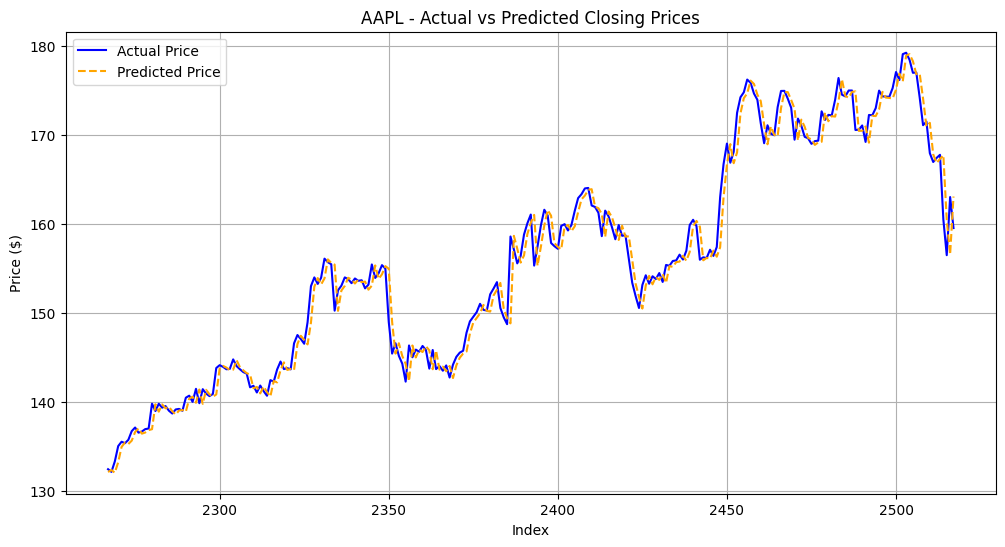

In [35]:
# Create comparison DataFrame
results = X_test.copy()
results['Actual_Close'] = y_test.values
results['Predicted_Close'] = y_pred

# Plot Actual vs Predicted closing prices
plt.figure(figsize=(12,6))
plt.plot(results.index, results['Actual_Close'], label='Actual Price', color='blue')
plt.plot(results.index, results['Predicted_Close'], label='Predicted Price', color='orange', linestyle='--')
plt.title(f'{stock} - Actual vs Predicted Closing Prices')
plt.xlabel('Index')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
df = df.drop(columns=['date'])

In [37]:
df

,open,high,low,close,volume,Name,Daily_Return,7Day_MA,Volatility_7Day,Prev_Close
0,15.07,15.12,14.63,14.75,8407500,AAL,NaN,NaN,NaN,NaN
1,14.89,15.01,14.26,14.46,8882000,AAL,-0.019661,NaN,NaN,14.75
2,14.45,14.51,14.10,14.27,8126000,AAL,-0.013140,NaN,NaN,14.46
3,14.30,14.94,14.25,14.66,10259500,AAL,0.027330,NaN,NaN,14.27
4,14.94,14.96,13.16,13.99,31879900,AAL,-0.045703,NaN,NaN,14.66
...,...,...,...,...,...,...,...,...,...,...
619035,76.84,78.27,76.69,77.82,2982259,ZTS,0.014206,78.535714,0.014188,76.73
619036,77.53,78.12,76.73,76.78,2595187,ZTS,-0.013364,78.314286,0.014398,77.82
619037,76.64,76.92,73.18,73.83,2962031,ZTS,-0.038421,77.540000,0.018006,76.78
619038,72.74,74.56,72.13,73.27,4924323,ZTS,-0.007585,76.565714,0.015717,73.83


In [38]:
#Unique method

In [39]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [40]:
df['Name'].nunique()

505

In [41]:
#R² Score
#Ranges from 0 to 1 (closer to 1 is better)
#how much of the variation in the target variable the model explains.

In [42]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")

R² Score: 0.98


In [43]:
trading_days = df.groupby('Name')['close'].count()
print(trading_days.tail())

Name
XYL     1259
YUM     1259
ZBH     1259
ZION    1259
ZTS     1259
Name: close, dtype: int64


In [44]:
#Check Unique Volume Values ,Detect Duplicates

In [45]:
unique_volumes = df['volume'].nunique()
print(f"Total unique volume values: {unique_volumes}")

Total unique volume values: 586441


In [46]:
#Find Companies with Highest Trading Volume Days

In [47]:
high_volume = df[df['volume'] > df['volume'].quantile(0.99)]
print(high_volume['Name'].unique())

['AAL' 'AAPL' 'ABBV' 'ABT' 'AES' 'AIG' 'AMAT' 'AMD' 'APC' 'ARNC' 'ATVI'
 'AVGO' 'AXP' 'BAC' 'BAX' 'BA' 'BBY' 'BMY' 'BSX' 'CBS' 'CDNS' 'CELG' 'CFG'
 'CHD' 'CHK' 'CMCSA' 'CNC' 'COG' 'COP' 'COTY' 'CRM' 'CSCO' 'CSX' 'CTL'
 'CTSH' 'CVS' 'C' 'DAL' 'DG' 'DISH' 'DIS' 'DRE' 'DVN' 'EBAY' 'ETFC' 'EVHC'
 'EXC' 'FB' 'FCX' 'FOXA' 'FOX' 'FTI' 'F' 'GE' 'GGP' 'GILD' 'GLW' 'GM'
 'HAL' 'HBAN' 'HBI' 'HCA' 'HES' 'HOLX' 'HPE' 'HPQ' 'INFO' 'INTC' 'JNPR'
 'JPM' 'KEY' 'KMI' 'KORS' 'KO' 'KR' 'LKQ' 'LLY' 'LNT' 'LUV' 'MAT' 'MA'
 'MDT' 'MGM' 'MNST' 'MOS' 'MO' 'MRK' 'MRO' 'MSFT' 'MS' 'MU' 'MYL' 'M'
 'NEM' 'NFLX' 'NKE' 'NLSN' 'NRG' 'NVDA' 'NWL' 'OKE' 'ORCL' 'O' 'PCG' 'PFE'
 'PG' 'PYPL' 'QCOM' 'RF' 'SBUX' 'SLB' 'STX' 'STZ' 'SWKS' 'SYF' 'SYMC'
 'SYY' 'TGT' 'TPR' 'TWX' 'T' 'UAA' 'UAL' 'UA' 'UDR' 'VLO' 'VRTX' 'VZ' 'V'
 'WBA' 'WFC' 'WMB' 'WMT' 'WU' 'WY' 'XOM' 'ZTS']


In [48]:
#gives you the top 10 most frequent stocks in the dataset.

In [49]:
df['Name'].value_counts().head(10)

Name
AAL     1259
NRG     1259
NOC     1259
NLSN    1259
NKE     1259
NI      1259
NFX     1259
NFLX    1259
NEM     1259
NEE     1259
Name: count, dtype: int64

Accuracy: 0.5277777777777778
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       122
           1       0.54      0.52      0.53       130

    accuracy                           0.53       252
   macro avg       0.53      0.53      0.53       252
weighted avg       0.53      0.53      0.53       252



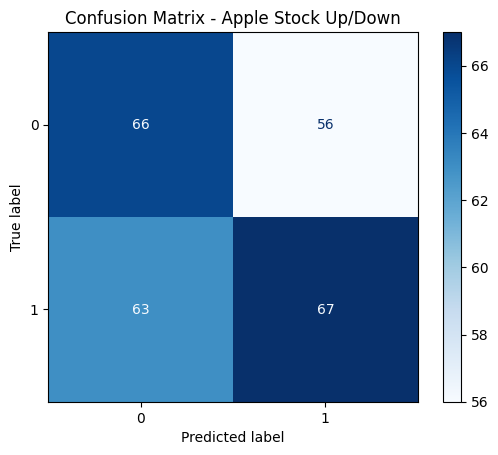

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\New folder\\all_stocks_5yr.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['Name', 'date'])

# Compute daily return and create target label
df['Daily_Return'] = df.groupby('Name')['close'].pct_change()
df['Target'] = (df['Daily_Return'] > 0).astype(int)
df = df.dropna()

# Filter for Apple stock
apple_df = df[df['Name'] == 'AAPL']
X = apple_df[['open', 'high', 'low', 'volume']]
y = apple_df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix - Apple Stock Up/Down")
plt.show()
